In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg.csv")

In [3]:
df.head()
# df=(df-df.min())/(df.max()-df.min())

df

,branch-load-misses,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.all_demand_miss,l2_rqsts.rfo_miss,cache-misses,LLC-load-misses,LLC-store-misses,CPI
0,3682927,3786773,26046,55857,17034,8088452,4386209,2857314,3168856,201050,552736,43461,100496,1.64
1,3111850,3368283,26389,49660,21256,6312558,7635130,1266080,2200059,200053,1293408,141336,110762,1.68
2,3273889,3467453,38338,51599,23192,10192578,5789121,3609473,3996263,256209,658226,66209,116460,1.95
3,3839120,3841064,37485,46444,19823,9098429,4993145,3187408,4562061,343174,701709,54055,89529,1.54
4,3540581,3463728,35389,46136,18339,9146964,4103576,3358791,3864200,242912,814435,58228,105303,1.55
5,3901662,3759701,29660,41090,20805,8988564,5449653,2400035,2895630,216519,1344718,105185,94979,1.52
6,1575727,1703744,22672,105430,29253,8035815,6299666,2677604,3632795,264541,1777040,138506,128152,1.59
7,2507417,2246386,25864,107417,32894,6525739,14775039,741598,2227636,226684,797554,65840,127043,1.95
8,2184030,2080092,16074,92518,24020,4641648,13129253,841288,2159331,147066,481831,43127,116712,2.07
9,756420,784696,8136,113549,160260,3017472,9372863,138629,1820095,1388796,5526156,561892,1022385,2.03


In [4]:
df.shape

(391, 14)

In [5]:
print(df.corr())

                          branch-load-misses  branch-misses  iTLB-load-misses  \
branch-load-misses                  1.000000       0.990149          0.532032   
branch-misses                       0.990149       1.000000          0.549787   
iTLB-load-misses                    0.532032       0.549787          1.000000   
dTLB-load-misses                   -0.561527      -0.564523         -0.412957   
dTLB-store-misses                  -0.204011      -0.214950         -0.111584   
L1-icache-load-misses               0.507839       0.511550          0.594082   
L1-dcache-load-misses              -0.264623      -0.262231         -0.291455   
l2_rqsts.code_rd_miss               0.596362       0.607554          0.671435   
l2_rqsts.all_demand_miss            0.206645       0.220512          0.295266   
l2_rqsts.rfo_miss                   0.064356       0.079956          0.088397   
cache-misses                       -0.650171      -0.658460         -0.390453   
LLC-load-misses             

In [6]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count        3.910000e+02   3.910000e+02        391.000000        391.000000   
mean         2.554251e+06   2.558766e+06      19036.751918     116418.690537   
std          1.065977e+06   1.045090e+06      13031.424345      77072.900443   
min          1.796490e+05   1.881120e+05        125.000000        326.000000   
25%          1.797976e+06   1.768980e+06       8291.000000      59286.500000   
50%          2.838508e+06   2.858621e+06      18741.000000      84678.000000   
75%          3.410463e+06   3.371023e+06      26080.000000     158887.500000   
max          4.431825e+06   4.264808e+06      86320.000000     533459.000000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count         391.000000           3.910000e+02           3.910000e+02   
mean        26096.751918           4.338498e+06           8.502538e+06   
std         43255.637383           3.003365e+06          

In [7]:
X = df[['branch-load-misses', 'branch-misses', 'iTLB-load-misses',
       'dTLB-load-misses', 'dTLB-store-misses', 'L1-icache-load-misses',
       'L1-dcache-load-misses', 'l2_rqsts.code_rd_miss',
       'l2_rqsts.all_demand_miss', 'l2_rqsts.rfo_miss', 'cache-misses',
       'LLC-load-misses', 'LLC-store-misses']]
y = df['CPI']

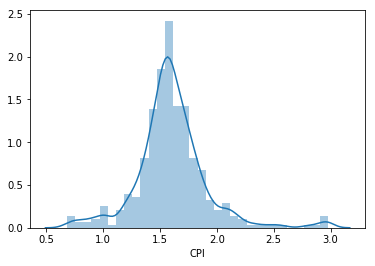

In [8]:
sns.distplot(df['CPI']);

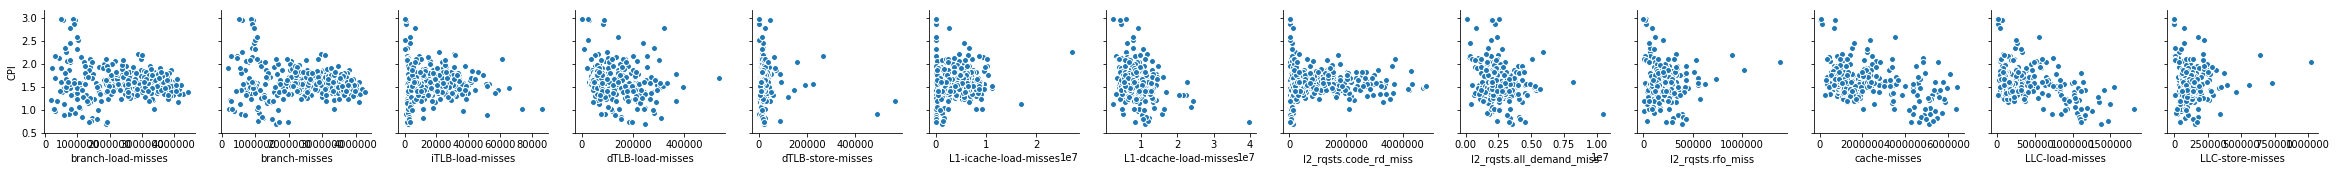

In [9]:
sns.pairplot(df, x_vars=['branch-load-misses', 'branch-misses', 'iTLB-load-misses',
       'dTLB-load-misses', 'dTLB-store-misses', 'L1-icache-load-misses',
       'L1-dcache-load-misses', 'l2_rqsts.code_rd_miss',
       'l2_rqsts.all_demand_miss', 'l2_rqsts.rfo_miss', 'cache-misses',
       'LLC-load-misses', 'LLC-store-misses'], y_vars='CPI', aspect=1, kind='scatter')
plt.show()

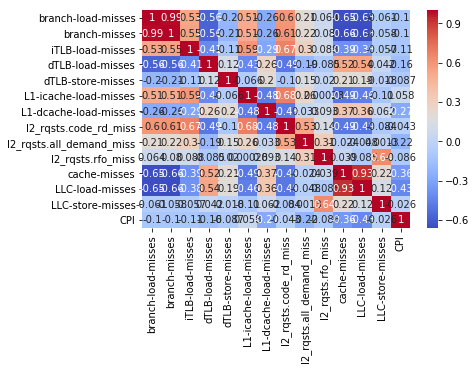

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [50]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [51]:
y_train.shape

(312,)

In [52]:
y_test.shape

(79,)

In [53]:
reg_model = linear_model.LinearRegression()

In [54]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [55]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [56]:

# reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  2.5846517134788987


[('branch-load-misses', 6.959363008015338e-09),
 ('branch-misses', -1.8709713567107478e-07),
 ('iTLB-load-misses', -1.2569395198699576e-06),
 ('dTLB-load-misses', -6.175980580502659e-07),
 ('dTLB-store-misses', -2.492270726297486e-07),
 ('L1-icache-load-misses', 1.3593340265462747e-09),
 ('L1-dcache-load-misses', -1.7526011383084442e-08),
 ('l2_rqsts.code_rd_miss', -4.870210440806583e-08),
 ('l2_rqsts.all_demand_miss', -3.1830079198179636e-09),
 ('l2_rqsts.rfo_miss', -3.5586113238611964e-07),
 ('cache-misses', 2.3840803093613256e-08),
 ('LLC-load-misses', -8.080613510789721e-07),
 ('LLC-store-misses', 4.6080583933437976e-07)]

In [19]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [20]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [1.588599   2.4022239  1.86321124 1.41983489 1.61750269 1.70022551
 1.75286349 1.60100376 1.7775253  1.59896228 1.71974939 1.56236511
 1.15919584 1.70269644 1.42031145 1.50725045 1.71344272 1.37947734
 1.52653953 1.74452199 2.01210451 1.59639169 1.58185016 1.74460411
 1.2362459  1.45182769 1.76011195 1.70071888 1.49807818 1.60182129
 1.60859374 1.48316058 1.84851891 1.61402196 1.56168085 1.70436811
 1.06251398 1.48051691 1.56176043 2.31971958 1.68553796 1.68448978
 1.38686037 1.4742255  1.89608568 1.58650761 1.81468777 1.56105949
 1.8553042  1.47289397 1.74426913 1.16383082 1.7275986  1.77600479
 1.65471761 1.5422404  1.5423676  1.63987597 1.52859326 1.53979823
 1.57876672 1.37435731 1.7902647  1.65085134 1.47333082 1.57572172
 1.64776221 1.58084114 1.53966614 1.4290287  1.74514872 1.65180065
 1.7507987  1.57645265 1.58535245 2.09680855 1.56787632 2.01580576
 1.81742473]

Prediction for train set: [1.68769539 1.82093572 1.21310966 1.49114014 1.55498254 1.657649

In [21]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})

reg_model_diff

,Actual value,Predicted value,Residue
124,1.45,1.588599,-0.138599
140,2.98,2.402224,0.577776
276,1.20,1.863211,-0.663211
252,1.30,1.419835,-0.119835
325,1.44,1.617503,-0.177503
136,1.71,1.700226,0.009774
368,1.81,1.752863,0.057137
132,1.75,1.601004,0.148996
342,1.75,1.777525,-0.027525
174,1.58,1.598962,-0.018962


In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


Mean Absolute Error: 0.17149754600543315
Mean Square Error: 0.05629100011476218
Root Mean Square Error: 0.23725724459911057
R^2 value : 0.5146610940097229
F-ststistic value :  4.214834416077294


Mean Absolute Error: 0.15999724107014246
Mean Square Error: 0.04710880103923899
Root Mean Square Error: 0.21704561971907885
R^2 value : 0.5146610940097229


In [23]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.49792526966523065

In [24]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

const                       3.434937e-92
branch-load-misses          5.309528e-01
branch-misses               1.583523e-01
iTLB-load-misses            6.174092e-02
dTLB-load-misses            2.892615e-02
dTLB-store-misses           1.609397e-01
L1-icache-load-misses       3.679683e-01
L1-dcache-load-misses       2.033968e-04
l2_rqsts.code_rd_miss       1.478124e-02
l2_rqsts.all_demand_miss    1.584329e-01
l2_rqsts.rfo_miss           2.053159e-03
cache-misses                8.479410e-02
LLC-load-misses             2.217867e-16
LLC-store-misses            5.089445e-02
Name: P>|t|, dtype: float64

In [25]:

from sklearn.metrics import r2_score
 
r2 = r2_score(y_test, y_pred) 
print('r2 score for  model is', r2) 


r2 score for  model is 0.497958274504834
